In [25]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
from pytesseract import Output
import cv2
from matplotlib import pyplot as plt

pytesseract.get_tesseract_version()
#https://nanonets.com/blog/ocr-with-tesseract/#ocrwithpytesseractandopencv

LooseVersion ('4.0.0-beta.1')

In [8]:
# grayscale
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
# thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
# erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

# opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

# skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

# template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [23]:
# Affiche l'image avec les boites de texte détectées
def viewImageWithBoxes(img):
    d = pytesseract.image_to_data(img, output_type=Output.DICT)
    NbBoites = len(d['level'])
    for i in range(NbBoites):
        # Récupère les coordonnées de chaque boite
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Affiche un rectangle
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Image N°4

jour ceci est un test


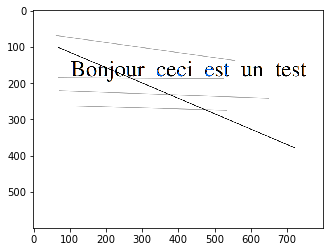

In [38]:
simage = r'/home/benoit/git/python_tutos/tesseract/image_4.png'
image_original = cv2.imread(simage)
print(pytesseract.image_to_string(image_original, lang='fra'))
plt.imshow(image_original,'gray')

jaur ceci est un test


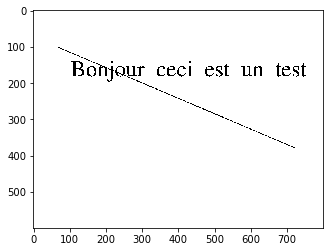

In [47]:
retouche2 = thresholding(grayscale(image_original))
print(pytesseract.image_to_string(retouche2, lang='fra'))
plt.imshow(retouche2,'gray')

Bonjour ceci est un test


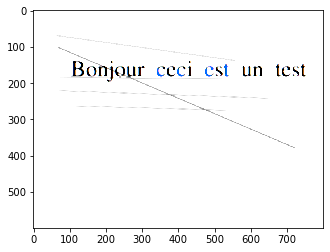

In [45]:
retouche3 = remove_noise(image_original)
print(pytesseract.image_to_string(retouche3, lang='fra'))
plt.imshow(retouche3)

# Image N°5

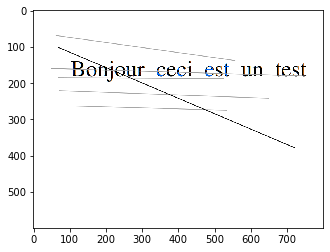

In [54]:
simage = r'/home/benoit/git/python_tutos/tesseract/image_5.png'
image_original = cv2.imread(simage)
print(pytesseract.image_to_string(image_original, lang='fra'))
plt.imshow(image_original,'gray')

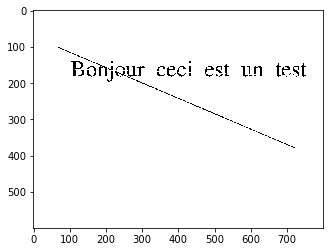

In [55]:
retouche2 = thresholding(grayscale(image_original))
print(pytesseract.image_to_string(retouche2, lang='fra'))
plt.imshow(retouche2,'gray')

Bonjour cect est un test


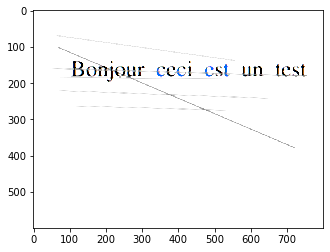

In [51]:
retouche3 = remove_noise(image_original)
print(pytesseract.image_to_string(retouche3, lang='fra'))
plt.imshow(retouche3)

Bonjour ceci est un test


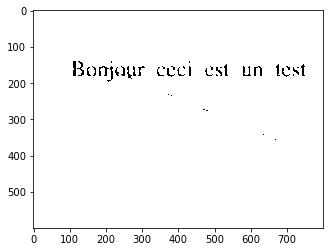

In [53]:
retouche4 = thresholding(grayscale(remove_noise(image_original)))
print(pytesseract.image_to_string(retouche4, lang='fra'))
plt.imshow(retouche4,'gray')